In [42]:
import numpy as np
from matplotlib import pyplot as plt, rcParams, rc

In [43]:
# code to extract data in python provided by author
import h5py

file_name = '/home/charles/Code/dataSet/SoliData/dsp/0_0_0.h5'

use_channel = 0 # data of channel 0 will be selected
with h5py.File(file_name, 'r') as f:
    # Data and label are numpy arrays
    data = f['ch{}'.format(use_channel)][()]
    label = f['label'][()]
print(data.shape)
print(type(data))
print(len(label))
## Data and label are numpy arrays


(68, 1024)
<class 'numpy.ndarray'>
68


In [44]:
data = data.reshape(data.shape[0],32,32) # reshaping the image into 32*32
data.shape # 68 frames of 32 X 32 RDI images in any one channel of this sample

(68, 32, 32)

In [68]:
from PIL import Image  
import numpy as np  

# 创建一个空的列表来存储图像  
images = []  

# 将每一帧转换为图像并添加到列表中  
for i in range(data.shape[0]):  
    img = Image.fromarray(data[i], mode='L')  # 'L'模式表示灰度图像  
    images.append(img)  

# 保存为GIF  
images[0].save('output.gif', save_all=True, append_images=images[1:], duration=100, loop=0)  

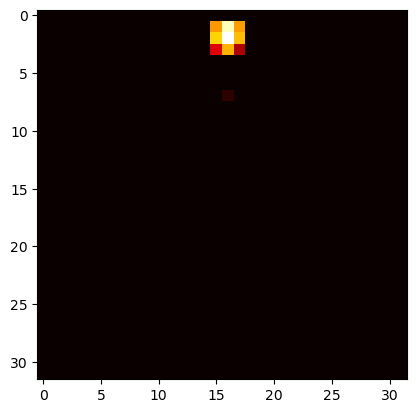

In [63]:
plt.imshow(data[0]).set_cmap('hot')
plt.show() # for channel 3

# plt.imshow(data[1]).set_cmap('hot')
# plt.show() # for channel 3

# plt.imshow(data[2]).set_cmap('hot')
# plt.show() # for channel 3

# plt.gray()
# plt.close()

In [46]:
def h5file_array(file_name,use_channel = 0):
    
    with h5py.File(file_name, 'r') as f:
        data = f['ch{}'.format(use_channel)][()]
        label = f['label'][()]
    return data, label

data, label = h5file_array(file_name,use_channel=1)
data = data.reshape(data.shape[0],32,32)

In [47]:
data.shape

(68, 32, 32)

In [66]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx).set_cmap('hot')

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

# plt.gray()
# plt.close()

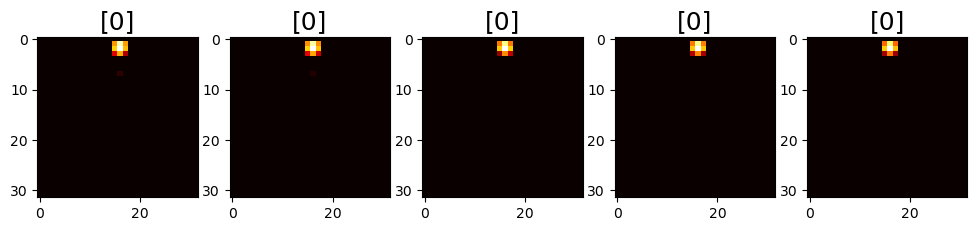

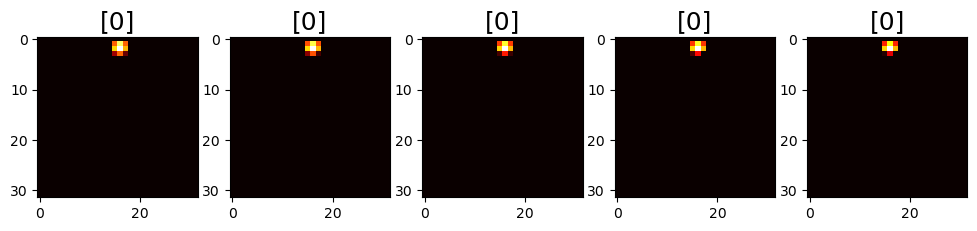

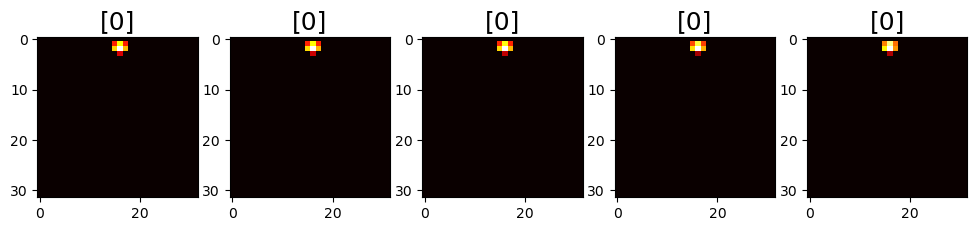

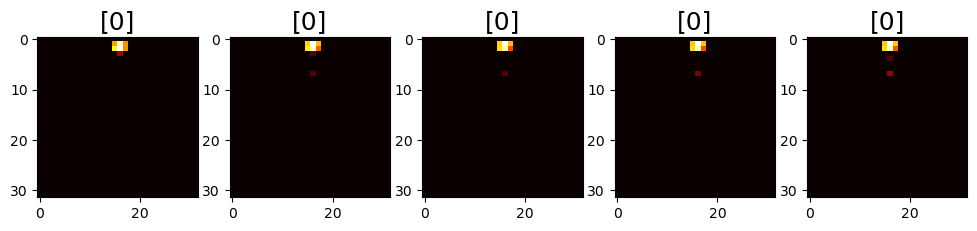

In [67]:
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

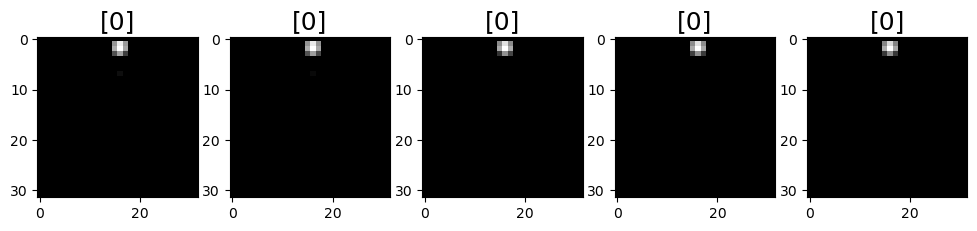

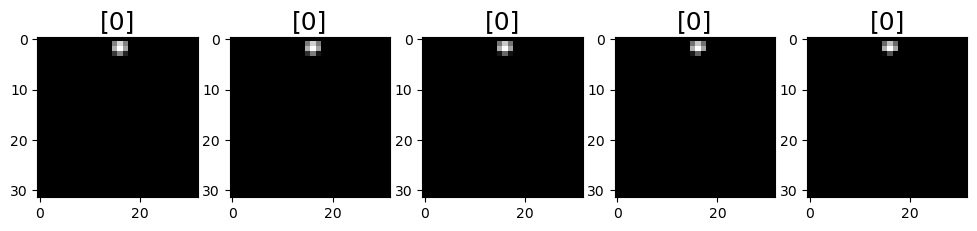

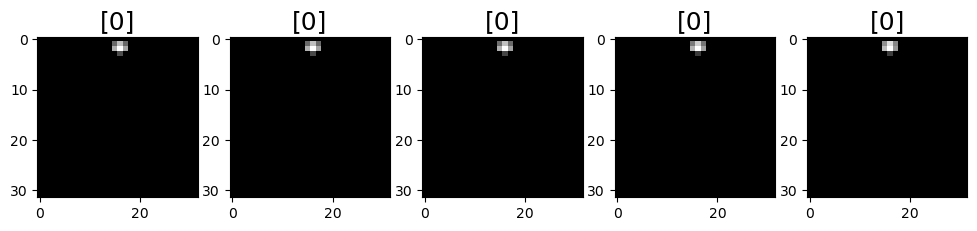

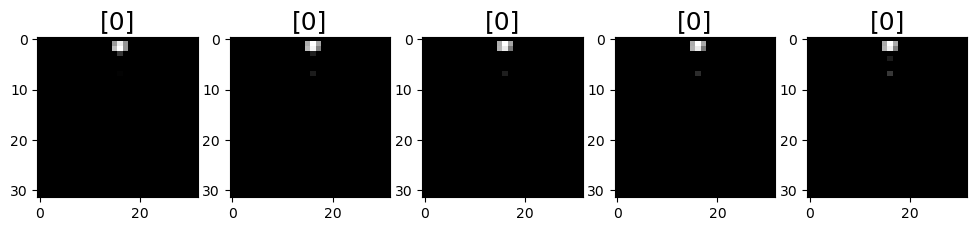

In [50]:
# Channel 3
# file_name1 = train_list[2000
data, label = h5file_array(file_name,use_channel=3)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])